# Повышение активности клиентов интернет-магазина «В один клик»: анализ покупательского поведения и разработка персонализированных предложений

## Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

Этот проект направлен на анализ покупательской активности клиентов онлайн-магазина, с целью выявления факторов, влияющих на прибыль, и разработки стратегии для повышения активности и прибыли от клиентов.

**Описание данных**

1. Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении..

   market_file.csv:
- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


2. Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

   market_money.csv:
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

3. Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

   market_time.csv:
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

4. Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

   money.csv:
- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

**План работы**

1. Загрузка и предобработка данных: Данные из четырёх файлов (market_file.csv, market_money.csv, market_time.csv, money.csv) будут загружены, проверены на соответствие описанию и предобработаны для дальнейшего анализа.
2. Исследовательский анализ: Будет проведён анализ данных из каждой таблицы, с фокусом на поведение постоянных клиентов (с покупательской активностью не менее трёх месяцев).
3. Корреляционный анализ: будет проведён корреляционный анализ признаков в количественной шкале, чтобы выявить факторы, влияющие на покупательскую активность и прибыль постоянных клиентов.
4. Моделирование: четыре модели классификации (KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression, SVC) будут обучены с использованием пайплайнов, с подбором гиперпараметров и выбором лучшей модели по выбранной метрике.
5. Анализ важности признаков: с помощью метода SHAP будет оценена важность признаков для лучшей модели, чтобы определить ключевые факторы, влияющие на покупательскую активность постоянных клиентов.
6. Сегментация покупателей: будет выполнена сегментация покупателей с использованием результатов моделирования и данных о прибыльности, выбран один сегмент для дополнительного анализа и разработки предложений по повышению его покупательской активности.
7. Рекомендации по персонализации: на основе анализа и моделирования будут предложены конкретные рекомендации по персонализации предложений для выбранного сегмента

## Загрузка данных

### Загрузка данных и их первичный просмотр 
Целью данного этапа работы с данными:
   - убедиться, что данные загружены правильно
   - получить первичную информацию о структуре и типах данных
   - проверить, что данные соответсвуют описанию

In [5]:
# сочетание библиотек чтобы все работало + необходимо обновить sklearn и перезапустить ядро
!pip install matplotlib==3.7.3 numpy==1.22 seaborn==0.11.1 -q
!pip install --upgrade scikit-learn -q
!pip install shap -q
!pip install phik -q

# Загрузка всех используемых в проекте библиотек
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import re
import phik
from sklearn.model_selection import train_test_split

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import roc_auc_score

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# кодировка целевого признака
from sklearn.preprocessing import LabelEncoder
import shap
import warnings
warnings.filterwarnings("ignore")

In [6]:
market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')
market_file.info()
display(market_file.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [7]:
market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')
market_money.info()
display(market_money.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [8]:
market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')
market_time.info()
display(market_time.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [9]:
money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';', decimal = ',')
money.info()
display(money.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


В колонке прибыль необходимо заменить в значениях запятую на точку и привести к типу float

### Вывод
   - в данных отсутсвтуют пропуски. Это хорошо, означает, что данные полные
   - название столбцов преобразуем в нижний регистр и в стиль snake_case
   - есть смысл поля "Покупательская активность", "Тип сервиса", "Популярная_категория", "Период" перевести в тип данных category. Данный тип занимает меньше памяти, быстрее обрабатывется данные.
   - в колонке прибыль необходимо заменить в значениях запятую на точку и привести к типу float
   - market_time: значение 'предыдцщий_месяц' нужно заменить на 'предыдущий_месяц' во всем датафрейме
   - в столбце "Тип сервиса" market_file значение "стандарт" написан с ошибкой. Необходимо проверить уникальные значения.

## Предобработка данных

### Преобразование наименований столбцов

In [10]:
# Используем цикл и библиотеку re (библиотека регулярных выражений, 
# которая позволяет искать и изменять текст в строках с помощью специальных шаблонов)
# import re

dfs = [
    market_file,
    market_money,
    market_time,
    money
]

for df in dfs:
    df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).replace(' ', '_').lower() for i in df.columns]

market_file.info()
print('----------------------------------')
market_money.info()
print('----------------------------------')
market_time.info()
print('----------------------------------')
money.info()
print('----------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

### Изменение типа данных

In [11]:
dfs = [
    market_file,
    market_money,
    market_time,
    money
]

columns = [
    "покупательская_активность",
    "тип_сервиса",
    "популярная_категория",
    "период"
]

# Проходим циклом по датафреймам и столбцам, если они присутствуют в датафрейме
for i in dfs:
    for y in columns:
        if y in i.columns:
            i[y] = i[y].astype('category')
        
market_file.info()
print('----------------------------------')
market_money.info()
print('----------------------------------')
market_time.info()
print('----------------------------------')
money.info()
print('----------------------------------')      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   1300 non-null   int64   
 1   покупательская_активность            1300 non-null   category
 2   тип_сервиса                          1300 non-null   category
 3   разрешить_сообщать                   1300 non-null   object  
 4   маркет_актив_6_мес                   1300 non-null   float64 
 5   маркет_актив_тек_мес                 1300 non-null   int64   
 6   длительность                         1300 non-null   int64   
 7   акционные_покупки                    1300 non-null   float64 
 8   популярная_категория                 1300 non-null   category
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64   
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64   
 11  ошибка_сервиса   

### Проверка на дубликаты

Находим и удаляем дубликаты

In [12]:
print(market_file.duplicated().sum())
print(market_money.duplicated().sum())
print(market_time.duplicated().sum())
print(money.duplicated().sum())

0
0
0
0


Отлично! Дубликатов нет.

In [13]:
# money['прибыль'] = money['прибыль'].replace(',', '.', regex=True).apply(pd.to_numeric, errors='coerce')
# money.info()
# display(money.head(5))

### Замена значения с орфографической ошибкой

In [14]:
market_time['период'].unique()
display(market_time.head(5))

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [15]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
market_time['период'].unique()

['текущий_месяц', 'предыдущий_месяц']
Categories (2, object): ['текущий_месяц', 'предыдущий_месяц']

In [16]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')
display(market_file['тип_сервиса'].unique())

['премиум', 'стандарт']
Categories (2, object): ['премиум', 'стандарт']

### Вывод
   - преобразованы столбцы "покупательская_активность", "тип_сервиса", "популярная_категория", "период"в тип данных category
   - название столбцов преобразуем в нижний регистр и в стиль snake_case
   - пропуски и дубликаты отсутствуют
   - в датафрейме money колонка "прибыль" в значениях запятая заменена на точку, а тип данных изменен с object на float
   - в датафрейме market_time значение 'предыдцщий_месяц' заменено на 'предыдущий_месяц'
   - в датафрейме market_file значение 'стандартт' заменено на 'стандарт'

## Исследовательский анализ

### Анализ money

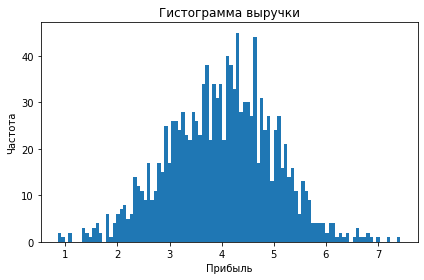

Асимметрия: -0.07624793854216559
Куртозис: 0.046810414386563526


In [17]:
plt.hist(money['прибыль'], bins=100)
plt.title('Гистограмма выручки')
plt.xlabel('Прибыль')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

skew = money['прибыль'].skew() 
kurt = money['прибыль'].kurt() 
print(f'Асимметрия: {skew}')
print(f'Куртозис: {kurt}')   

Распределение близкое к нормальному, отсутсвуют выбросы, что позволяет считать данные пригодными для дальнейшего построения модели

### Отбор клиентов с покупательской активностью не менее трёх месяцев

Нам интересны клиенты с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Сделаем выборку.

У нас есть выборка money. Данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

In [18]:
money['прибыль'].describe()

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

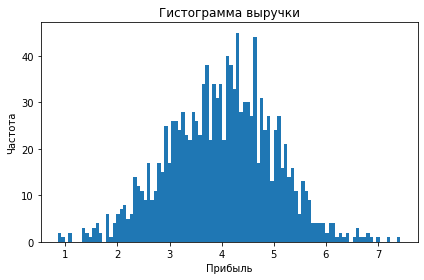

Асимметрия: -0.07624793854216559
Куртозис: 0.046810414386563526


In [19]:
plt.hist(money['прибыль'], bins=100)
plt.title('Гистограмма выручки')
plt.xlabel('Прибыль')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

skew = money['прибыль'].skew() 
kurt = money['прибыль'].kurt() 
print(f'Асимметрия: {skew}')
print(f'Куртозис: {kurt}')   

Все значения выше 0. Все покупатели были активны последние 3 месяца.

In [20]:
market_file = market_file[market_file["id"].isin(money["id"])]
market_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   1300 non-null   int64   
 1   покупательская_активность            1300 non-null   category
 2   тип_сервиса                          1300 non-null   category
 3   разрешить_сообщать                   1300 non-null   object  
 4   маркет_актив_6_мес                   1300 non-null   float64 
 5   маркет_актив_тек_мес                 1300 non-null   int64   
 6   длительность                         1300 non-null   int64   
 7   акционные_покупки                    1300 non-null   float64 
 8   популярная_категория                 1300 non-null   category
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64   
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64   
 11  ошибка_сервиса   

Все клиенты из выборки market_file были активны посление 3 месяца.

### Анализ market_money

In [21]:
market_money['выручка'].describe()

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64

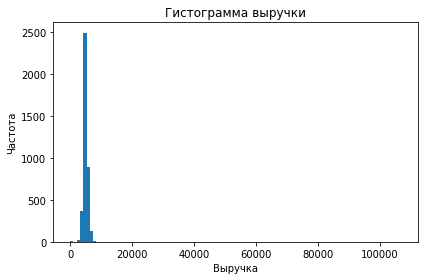

In [22]:
plt.hist(market_money['выручка'], bins=100)
plt.title('Гистограмма выручки')
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

На гистограмме видно, что в даных имеется аномальные значения. Поброуем выявить аномальные значения отсортировав их по убыванию.

In [23]:
print(market_money['выручка'].sort_values(ascending=False).head(10))
# На память
# ascending=False указывает на нисходящую сортировку. 
# если бы было ascending=True, то сортировка происходила бы в возрастающем порядке

98      106862.2
435       7799.4
262       7605.3
1481      7557.0
2388      7547.8
566       7467.9
2266      7410.0
1003      7401.6
1632      7401.6
1573      7374.0
Name: выручка, dtype: float64


Имеем аномальное значение, которое может существенно повлиять на качество модели, поэтому удаляем строку, где это значение присутствует.

In [24]:
market_money = market_money.drop(index=98)
print(market_money['выручка'].sort_values(ascending=False).head(10))

435     7799.4
262     7605.3
1481    7557.0
2388    7547.8
566     7467.9
2266    7410.0
1003    7401.6
1632    7401.6
1573    7374.0
2922    7370.6
Name: выручка, dtype: float64


Также помним что нам нужны клиенты которые совершали покупки за последнии 3 месяца. Соответственно клинеты с выручкой равной 0, нам также не интересны. Удаляем строки где значении выручки равно 0

In [25]:
market_money = market_money[market_money['выручка'] != 0]
market_money['выручка'].describe()

count    3893.000000
mean     5007.282918
std       679.724898
min      2758.700000
25%      4592.000000
50%      4959.000000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64

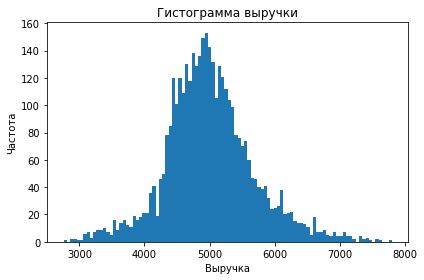

Асимметрия: 0.3573446145150811
Куртозис: 1.0574419007760563


In [26]:
plt.hist(market_money['выручка'], bins=100)
plt.title('Гистограмма выручки')
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

skew = market_money['выручка'].skew() 
kurt = market_money['выручка'].kurt() 
print(f'Асимметрия: {skew}')
print(f'Куртозис: {kurt}')        

Небольшая ассиметрия, распределение близкое к нормальному. Это хорошо. Некоторые модели машинного обучения чувствительны к асимметрии данных. Например, линейные модели могут давать неверные прогнозы, если данные сильно асимметричны.
Куртозис от 1 до 5 счиатется нормальным, что также хорошо для обучения моделей машинного обучения.

Построим блоксплот, посмотрим распределение оставшихся данных

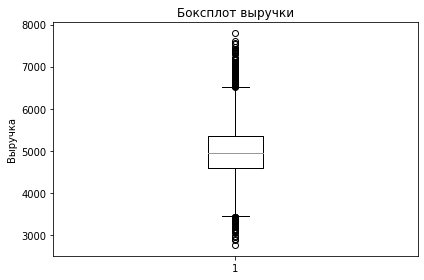

In [27]:
plt.boxplot(market_money['выручка'])
plt.title('Боксплот выручки')
plt.ylabel('Выручка')
plt.tight_layout()
plt.show()

In [28]:
# Вычисление значений блоксплота
q1 = market_money['выручка'].quantile(0.25)
q2 = market_money['выручка'].quantile(0.5)  # Медиана
q3 = market_money['выручка'].quantile(0.75)
iqr = q3 - q1 
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

print(f'--- выручка ---')
print(f'Q1: {q1}')
print(f'Медиана (Q2): {q2}')
print(f'Q3: {q3}')
print(f'IQR: {iqr}')
print(f'Нижний ус: {lower_whisker}')
print(f'Верхний ус: {upper_whisker}')
print('---')

--- выручка ---
Q1: 4592.0
Медиана (Q2): 4959.0
Q3: 5363.0
IQR: 771.0
Нижний ус: 3435.5
Верхний ус: 6519.5
---


Аномальных значений больше нет, Видим многочисленные выбросы, но реальные данные вполне могут быть так распределены. Оставляем получившуюся выборку, т.к. нам важно реальное распределение, чтобы построить достоверную модель.

### Анализ market_time

In [29]:
market_time['минут'].describe()

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

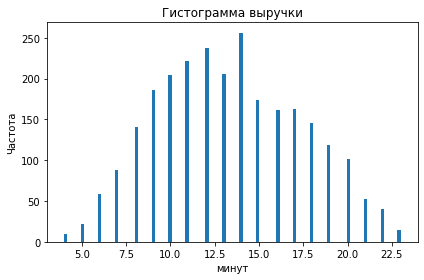

Асимметрия: 0.15519176936259133
Куртозис: -0.6943444055569836


In [30]:
plt.hist(market_time['минут'], bins=100)
plt.title('Гистограмма выручки')
plt.xlabel('минут')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

skew = market_time['минут'].skew() 
kurt = market_time['минут'].kurt() 
print(f'Асимметрия: {skew}')
print(f'Куртозис: {kurt}')  

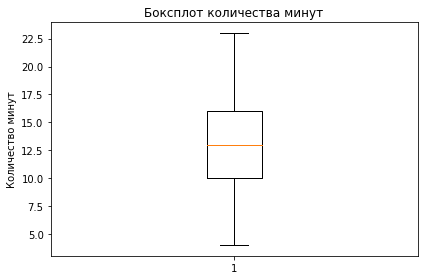

In [31]:
plt.boxplot(market_time['минут'])
plt.title('Боксплот количества минут')
plt.ylabel('Количество минут')
plt.tight_layout()
plt.show()

Распределение близкое к нормальному, отсутсвуют выбросы, что позволяет считать данные пригодными для дальнейшего построения модели

### Анализ market_file

Выведем сатистическое описание каждого стобца из датасета market_file и проверим на аномалии.

In [32]:
market_file.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   1300 non-null   int64   
 1   покупательская_активность            1300 non-null   category
 2   тип_сервиса                          1300 non-null   category
 3   разрешить_сообщать                   1300 non-null   object  
 4   маркет_актив_6_мес                   1300 non-null   float64 
 5   маркет_актив_тек_мес                 1300 non-null   int64   
 6   длительность                         1300 non-null   int64   
 7   акционные_покупки                    1300 non-null   float64 
 8   популярная_категория                 1300 non-null   category
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64   
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64   
 11  ошибка_сервиса   

In [33]:
market_file.describe() 

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


С первого взгляда данные выглядят нормально, не видно явно ошибочных значений или выбросов. К стати, в по столбцу видно что все пользователи имеюют подписку свеше 3 месяцев, поэтому данные о всех клиентах подойдут для исследования.

Далее построим гистограммы и блоксплоты для всех числовых значений

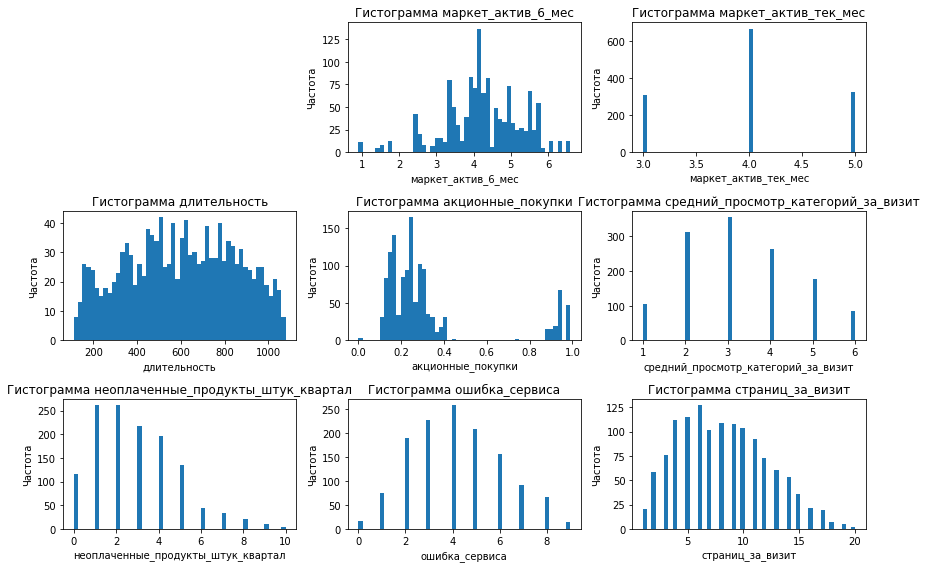

In [34]:
# Гистограммы
plt.figure(figsize=(12, 8))
for i, column in enumerate(market_file.select_dtypes(include=['number']).columns):
    if column != 'id':
        plt.subplot(3, 3, i + 1)
        plt.hist(market_file[column], bins=50)
        plt.title(f'Гистограмма {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')
plt.tight_layout()
plt.show()

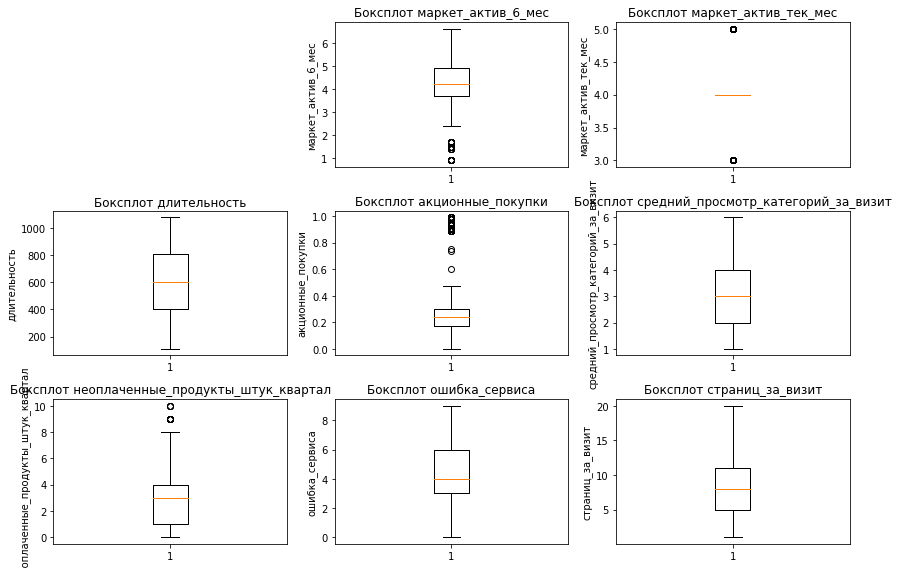

In [35]:
plt.figure(figsize=(12, 8))  # Вы можете изменить размер фигуры по желанию
for i, column in enumerate(market_file.select_dtypes(include=['number']).columns):
    # Пропускаем столбец 'id'
    if column == 'id':
        continue
    plt.subplot(3, 3, i + 1)  # Изменяем на (3, 2) для 6 подграфиков
    plt.boxplot(market_file[column])
    plt.title(f'Боксплот {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

Из диаграмм видно, что "акционные_покупки" имеет бимодальное распределение и его можно сделать категориальным

In [36]:
# Функция pd.cut() из библиотеки pandas используется для разбиения данных на категории.
market_file['акционные_покупки_категория'] = pd.cut(market_file['акционные_покупки'], 
                                        bins=[0, 0.8, 1], 
                                        labels=['доля_менее_0.8', 'доля_более_0.8'],
                                        include_lowest=True) #нижняя граница первого интервала должна включаться в категорию

In [37]:
market_file.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   1300 non-null   int64   
 1   покупательская_активность            1300 non-null   category
 2   тип_сервиса                          1300 non-null   category
 3   разрешить_сообщать                   1300 non-null   object  
 4   маркет_актив_6_мес                   1300 non-null   float64 
 5   маркет_актив_тек_мес                 1300 non-null   int64   
 6   длительность                         1300 non-null   int64   
 7   акционные_покупки                    1300 non-null   float64 
 8   популярная_категория                 1300 non-null   category
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64   
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64   
 11  ошибка_сервиса   

### Вывод
   - выборки money и market_time распределение близкое к нормальному, отсутсвуют выбросы, что позволяет считать данные пригодными для дальнейшего построения модели
   - market_money: выявлены и удалены аномалии
   - market_file: на основе поля акционные_покупки (бимодальное распределение) создано новое поле акционные_покупки_категория
   - отобраны клиенты с покупательской активностью последние 3 месяца      

## Объединение таблиц

Объедините таблицы market_file, market_money, market_time. Данные о прибыли из файла money.csv при моделировании не используются. Учтем, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделаем отдельный столбец для каждого периода.

In [40]:
display(market_money['период'].unique())

['текущий_месяц', 'препредыдущий_месяц', 'предыдущий_месяц']
Categories (3, object): ['текущий_месяц', 'препредыдущий_месяц', 'предыдущий_месяц']

In [41]:
display(market_time['период'].unique())

['текущий_месяц', 'предыдущий_месяц']
Categories (2, object): ['текущий_месяц', 'предыдущий_месяц']

In [42]:
# Разделяем данные по периодам в market_money
market_money_pivot = market_money.pivot(index='id', columns='период', values='выручка')
market_money_pivot.columns = ['выручка_' + str(col) for col in market_money_pivot.columns]

# Разделяем данные по периодам в market_time
market_time_pivot = market_time.pivot(index='id', columns='период', values='минут')
market_time_pivot.columns = ['время_' + str(col) for col in market_time_pivot.columns]

# Объединяем таблицы с помощью inner join по значениям id
data = market_file.merge(market_money_pivot, on='id', how='inner')
data = data.merge(market_time_pivot, on='id', how='inner')

# Вывод итоговой таблицы
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   1300 non-null   int64   
 1   покупательская_активность            1300 non-null   category
 2   тип_сервиса                          1300 non-null   category
 3   разрешить_сообщать                   1300 non-null   object  
 4   маркет_актив_6_мес                   1300 non-null   float64 
 5   маркет_актив_тек_мес                 1300 non-null   int64   
 6   длительность                         1300 non-null   int64   
 7   акционные_покупки                    1300 non-null   float64 
 8   популярная_категория                 1300 non-null   category
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64   
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64   
 11  ошибка_сервиса   

Видим пропуски в столбцах. Проверим

In [43]:
print(data.isna().sum())

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
акционные_покупки_категория            0
выручка_предыдущий_месяц               3
выручка_препредыдущий_месяц            3
выручка_текущий_месяц                  1
время_предыдущий_месяц                 0
время_текущий_месяц                    0
dtype: int64


Удалим строки с пропусками

In [44]:
data = data.dropna()

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   1296 non-null   int64   
 1   покупательская_активность            1296 non-null   category
 2   тип_сервиса                          1296 non-null   category
 3   разрешить_сообщать                   1296 non-null   object  
 4   маркет_актив_6_мес                   1296 non-null   float64 
 5   маркет_актив_тек_мес                 1296 non-null   int64   
 6   длительность                         1296 non-null   int64   
 7   акционные_покупки                    1296 non-null   float64 
 8   популярная_категория                 1296 non-null   category
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64   
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64   
 11  ошибка_сервиса   

### Вывод
   - объединены таблицы market_file, market_money, market_time по значению id
   - столбцы 'выручка' и 'время' в таблицах market_money, market_time разделены на периоды
   - их объединеннлй таблицы удалены строки с пропусками

## Корреляционный анализ

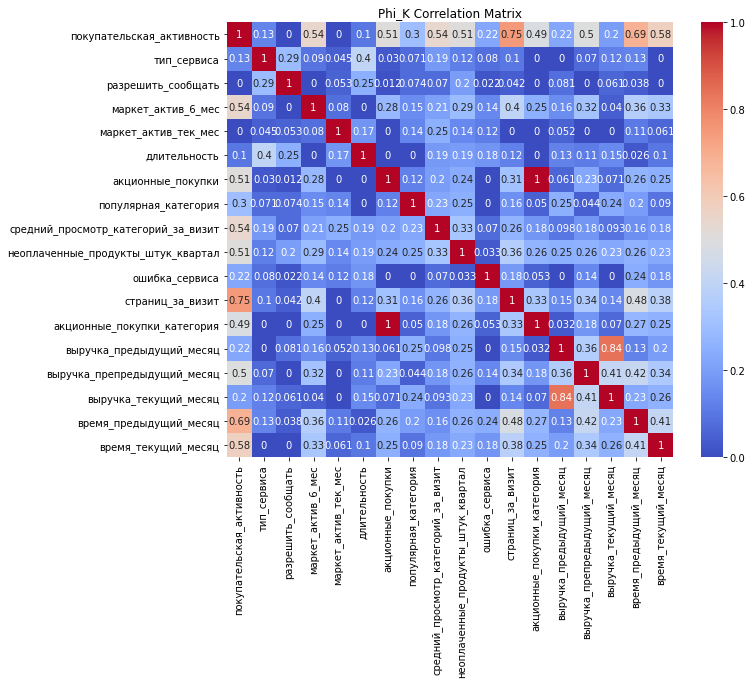

In [46]:
# import phik

# Исключим столбец 'id' из корреляции
data_corr = data.drop('id', axis=1)

# Список  количественных  столбцов
interval_cols = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 
                 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 
                 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 
                 'страниц_за_визит', 'выручка_предыдущий_месяц', 
                 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 
                 'время_предыдущий_месяц', 'время_текущий_месяц']

# # Список  категориальных  столбцов
# categorical_cols = ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
#                    'популярная_категория', 'акционные_покупки_категория']

# Вычисляем  матрицы  корреляции. Передаем только список с количественными признаки. 
# Дадьше phik определит остальные признаки как категориальные
corr_matrix = data_corr.phik_matrix(interval_cols=interval_cols)

# Визуализация  матрицы  корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()


In [47]:
print(corr_matrix['покупательская_активность'])

покупательская_активность              1.000000
тип_сервиса                            0.129940
разрешить_сообщать                     0.000000
маркет_актив_6_мес                     0.544831
маркет_актив_тек_мес                   0.000000
длительность                           0.099901
акционные_покупки                      0.506276
популярная_категория                   0.299717
средний_просмотр_категорий_за_визит    0.539607
неоплаченные_продукты_штук_квартал     0.505655
ошибка_сервиса                         0.224154
страниц_за_визит                       0.749888
акционные_покупки_категория            0.487015
выручка_предыдущий_месяц               0.224638
выручка_препредыдущий_месяц            0.497393
выручка_текущий_месяц                  0.197213
время_предыдущий_месяц                 0.685138
время_текущий_месяц                    0.576770
Name: покупательская_активность, dtype: float64


Ключевыми факторами, влияющими 'покупательская_активность', являются: маркет_актив_6_мес(КК=0.54), акционные_покупки(КК=0.51), средний_просмотр_категорий_за_визит(КК=0.54), неоплаченные_продукты_штук_квартал(КК=0.5), время_предыдцщий_месяц(КК=0.68), время_текущий_месяц(КК=0.58), выручка_препредыдущий_месяц(КК=0.5),акционные_покупки_категория(КК=0.49), страниц_за_визит (КК=0.75)

'*'КК - коэффициент корреляции

Мультиколлиниарность: среди выбранных признаков есть мультиколлинарность. Между 'акционные_покупки' и 'акционные_покупки_категория' корреляция равна единице (КК=1). 'акционные_покупки' имеет бимодальность, в 'акционные_покупки_категория' бимодальность устранена. Выбираем 'акционные_покупки_категория', 'акционные_покупки' исключаем из входных признаков

Также если предсказываем снижение активности логично показывать модели признак выручки в периоды, поэтому включим признаки: выручка_препредыдущий_месяц(КК=0.5), 'выручка_предыдущий_месяц'(КК=0.23), 'выручка_текущий_месяц'(КК=0.2)

### Вывод

   На основе матрицы корреляции и логический рассуждений определены следующие входные признаки:
   - страниц_за_визит(КК=0.75)
   - время_предыдущий_месяц(КК=0.68)
   - время_текущий_месяц(КК=0.58)
   - маркет_актив_6_мес (КК=0.54)
   - средний_просмотр_категорий_за_визит (КК=0.54)
   - неоплаченные_продукты_штук_квартал(КК=0.5)
   - выручка_препредыдущий_месяц(КК=0.5)
   - акционные_покупки_категория(КК=0.49)
   - выручка_предыдущий_месяц(КК=0.23)
   - выручка_текущий_месяц(КК=0.2)
   - тип_сервиса (добавим один признак для OrdinalEncoder)
   
11 признаков (оптимально 7-10). Добавление большего количества признаков может привести к переобучению модели, которая будет хорошо работать на обучающих данных, но плохо на новых данных

## Использование пайплайнов

In [48]:
# # Оставим только целевой и входные признаки 
data_for_pipe = data[['покупательская_активность', 'страниц_за_визит', 'время_предыдущий_месяц', 'время_текущий_месяц', 
                'маркет_актив_6_мес', 'средний_просмотр_категорий_за_визит', 'выручка_текущий_месяц',
                'неоплаченные_продукты_штук_квартал', 'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц',
                'акционные_покупки_категория', 'id', 'тип_сервиса']]

# Делаем 'id' индексом в data_for_pipe и money
data_for_pipe = data_for_pipe.set_index('id')

data_for_pipe.nunique()

покупательская_активность                 2
страниц_за_визит                         20
время_предыдущий_месяц                   19
время_текущий_месяц                      20
маркет_актив_6_мес                       41
средний_просмотр_категорий_за_визит       6
выручка_текущий_месяц                  1238
неоплаченные_продукты_штук_квартал       11
выручка_препредыдущий_месяц             789
выручка_предыдущий_месяц               1120
акционные_покупки_категория               2
тип_сервиса                               2
dtype: int64

### Создание пайплайна

**Итак теорию вспомнили теперь пишим весь код выбора лучшей модели и гиперпараметров**

In [61]:
# Гарантирует воспроизводимость результатов, что важно для отладки и сравнения разных моделей или методов.
RANDOM_STATE = 42
# TEST_SIZE = 0.25 означает, что 25% данных будут использованы для тестирования модели, а оставшиеся 75% - для обучения.
TEST_SIZE = 0.25

# разделение на тренировочную и тестовую выборки
# X_train, X_test, y_train, y_test = train_test_split(
#     X, 
#     y, 
#     random_state=RANDOM_STATE
# )
X_train, X_test, y_train, y_test = train_test_split(
    data_for_pipe.drop(['покупательская_активность'], axis=1),
    data_for_pipe['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = data['покупательская_активность'])

# Параметр stratify = data['покупательская_активность'] в функции train_test_split 
# используется для стратифицированного разбиения данных

# Кодирование целевой переменной
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [62]:
X_train.shape, X_test.shape

((972, 11), (324, 11))

Стратифицированное разбиение означает, что данные разделяются на обучающую и тестовую выборки таким образом, чтобы соотношение классов (в данном случае, покупательская_активность) в обеих выборках было пропорционально их соотношению в исходных данных.

Зачем нужна стратификация?

- Сбалансированные выборки: при работе с несбалансированными данными (например, когда один класс значительно преобладает над другим) стратифицированное разбиение помогает создать более сбалансированные обучающую и тестовую выборки.
- Точность оценки: Стратифицированное разбиение позволяет более точно оценить точность модели на неизвестных данных, поскольку тестовая выборка будет содержать соотношение классов, близкое к исходным данным.
- Предотвращение смещения: без стратификации разбиение может привести к тому, что один класс будет представлен в тестовой выборке недостаточно или чрезмерно. Это может исказить результаты тестирования и привести к неверным выводам о точности модели.

In [63]:
# создаём списки с названиями признаков
ohe_columns = ['акционные_покупки_категория']
ord_columns = ['тип_сервиса']
num_columns = ['страниц_за_визит', 'время_предыдущий_месяц', 'время_текущий_месяц',
               'маркет_актив_6_мес', 'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал', 'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц',
               'выручка_текущий_месяц']

In [64]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error')) # sparse=False нужно по идее добавить аргумент
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [65]:
print(market_file['тип_сервиса'].unique())

['премиум', 'стандарт']
Categories (2, object): ['премиум', 'стандарт']


In [66]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
     # словарь для модели SVC()
     # probability=True в SVC позволяет модели вычислять вероятности классов для каждого образца
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': [0.1, 1, 10],
        'models__kernel': ['linear', 'rbf'], 
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
# код из теории, на память
# y_test_pred = randomized_search.predict(X_test) 
# print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

probabilities =randomized_search.predict_proba(X_test)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой на тестовой выборке:', roc_auc_score(y_test, probabilities_one))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['акционные_покупки_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                             

In [67]:
class_counts = data['покупательская_активность'].value_counts()

# Вычисление доли каждого класса
class_balance = class_counts / len(data)

# Вывод результатов
print(class_counts)
print(class_balance)

Прежний уровень    802
Снизилась          494
Name: покупательская_активность, dtype: int64
Прежний уровень    0.618827
Снизилась          0.381173
Name: покупательская_активность, dtype: float64


Видим несбалансированность классов: соотношение 62% на 38%

**Выбор метрики**

<br>Рассмотрим почему ROC-AUC лучше чем другие метрики в данном конкретном случае?
1. ROC-AUC больше подходит для несбалансированных данных, чем F1-score и Accuracy, которые более пригодны для сбалансированных классов
2. Precision и Recall фокусируются на отдельных классах, в отличии от ROC-AUC, которая учитывает оба класса одновременно

попробуем GridSearchCV

In [68]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = {'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
             'models': [DecisionTreeClassifier(random_state=RANDOM_STATE),
                        KNeighborsClassifier(),
                        SVC(random_state=RANDOM_STATE),
                        LogisticRegression(random_state=RANDOM_STATE)]}

grid = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = grid.predict(X_test) 
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['акционные_покупки_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                             

Метрика улучшилась для модели опорных векторов, но выскочило предупреждение что алгоритм оптимизации lbfgs (используется по умолчанию в LogisticRegression) не сходится к решению за указанное количество итераций (max_iter).

Параметр C в LogisticRegression управляет силой регуляризации.

Регуляризация — это метод, применяемый в машинном обучении для предотвращения переобучения модели. Переобучение происходит, когда модель слишком хорошо запоминает обучающие данные и, как следствие, плохо обобщает на новые, невидимые данные.

Регуляризация достигается путём добавления штрафного члена к функции потерь модели. Этот штрафной член зависит от величины весов модели.

Существуют два основных типа регуляризации, используемые в LogisticRegression:
- L1-регуляризация (Lasso): штраф за величину весов модели пропорционален сумме абсолютных значений весов. Этот тип регуляризации склонен «отбрасывать» незначимые признаки (делает их вес равным нулю).
- L2-регуляризация (Риджа): штраф за величину весов модели пропорционален сумме квадратов весов. Этот тип регуляризации уменьшает веса модели, но не сводит их к нулю.

В LogisticRegression параметр C обратно пропорционален силе регуляризации. Это означает, что чем больше значение C, тем меньше сила регуляризации, и модель более склонна к переобучению.

- Очень малое C (например, 0.01 или меньше): сильная регуляризация. Модель будет очень простой, с небольшими весами и, скорее всего, недообученной. Она может не учитывать все тонкости данных и иметь низкую точность как на обучающей, так и на тестовой выборке
- Нормальное C (например, 0.1, 1, 10): сбалансированная регуляризация. Модель будет более сложной, чем при очень малом C, но не будет слишком склонна к переобучению. Она может иметь хорошую точность как на обучающей, так и на тестовой выборке.
- Большое C (например, 100, 1000 или выше): слабая регуляризация. Модель будет очень сложной, с большими весами. Она будет более склонна к переобучению, и ее точность на тестовой выборке может быть ниже, чем на обучающей.

Гиперпараметр penalty='l1' означает, что используется регуляризация L1, которая склонна отбирать важные признаки и устранять незначимые.

Параметр solver='liblinear' в LogisticRegression означает, что будет использоваться алгоритм оптимизации liblinear, который хорошо подходит для L1-регуляризации (Lasso)

Алгоритм оптимизации - это метод, который используется для нахождения наилучших значений параметров (весов) модели машинного обучения. Он минимизирует функцию потери модели (например, функцию логистической потери для LogisticRegression).

liblinear хорошо подходит для больших наборов данных и может быстро сходиться к решению, особенно в случае разреженных данных.

Другие алгоритмы оптимизации в LogisticRegression:
- lbfgs: Алгоритм квазиньютоновского спуска. По умолчанию используется в LogisticRegression, если не указан solver.
- sag: Алгоритм стохастического спуска. Может быть быстрее lbfgs для больших наборов данных.
- saga: Улучшенная версия sag. Может быть еще быстрее sag, особенно для разреженных данных.

Как выбрать алгоритм оптимизации:
- L1-регуляризация:  liblinear.
- L2-регуляризация: lbfgs, sag или saga.
- Большие наборы данных: sag или saga могут быть быстрее lbfgs.
- Разреженные данные: liblinear или saga могут быть более эффективными.

### Вывод

RandomizedSearchCV:
1. Лучшая модель: Логистическая регрессия. Хорошо подходит для бинарной задачи классификации, особенно при достаточно большом количестве данных, как в этом случае
2. С=4: Хорошее значение C (в промежутке от 1 до 10) означает, что регуляризация присутствует, но не слишком большая, что позволяет модели выявлять сложные закономерности в данных, не переобучаясь.
3. Использование L1-регуляризации (Lasso) помогает отбирать важные признаки и упрощать модель, что может улучшить её обобщающую способность и интерпретируемость
4. MinMaxScaler и OneHotEncoder позволило лучше всего подготовить данные для обучения модели и улучшить ее точность

GridSearchCV:
1. Лучшая модель: Метод опорных векторов. Модель для классификации, которая основана на поиске оптимальной разделяющей гиперплоскости в многомерном пространстве.
2. Модель не на много показывает лучше результат, чем Логистическая регрессия на тестовой выборке, но алгоритм оптимизации lbfgs (используется по умолчанию в LogisticRegression) не сходится к решению за указанное количество итераций (max_iter).

LogisticRegression более проста для интерпретации, так как можно оценить вклад каждого признака в предсказание. SVC с нелинейным ядром более сложная для интерпретации

## Анализ важности признаков

### Важность признаков для лучшей модели и построение графика важности с помощью метода SHAP

Однозначную оценку вклада признака в каждый прогноз показывают значения Шепли, их оценивают методом SHAP (SHapley Additive exPlanations). Он вычисляет, как отдельный признак помог присвоить модели итоговое значение целевого.
Значения Шепли — это понятие из теории игр, которое используют для оценки распределения выигрыша между партнёрами по игре.

Аналогичную логику применяют к моделям МО. Признаки модели — это игроки, призовой фонд — итоговое предсказание модели, а вклад признака — это значение Шепли.

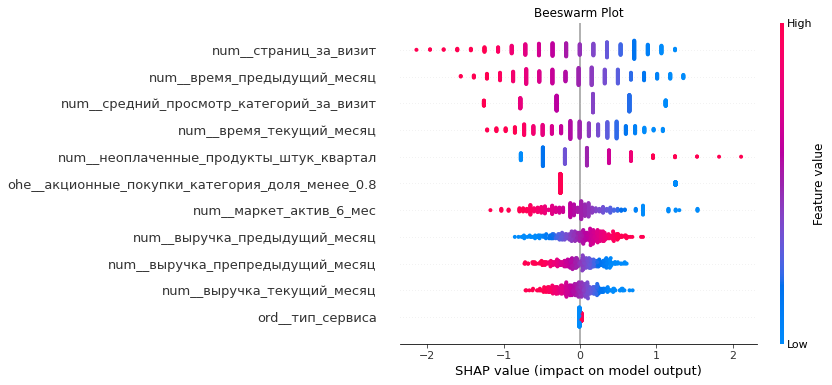

In [69]:
# import shap

# Получение лучшей модели из RandomizedSearchCV
best_model = randomized_search.best_estimator_

# Преобразование тестовых данных с помощью пайплайна
X_test_transformed = best_model['preprocessor'].transform(X_test)

# # Получение  названий  признаков
feature_names = randomized_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
# print(feature_names)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=feature_names)

# Создание объекта Explainer для SHAP
explainer = shap.LinearExplainer(best_model.named_steps['models'], X_test_transformed)

# Вычисление значений SHAP
shap_values = explainer(X_test_transformed)

# Построение графика с помощью shap.plots.beeswarm
shap.plots.beeswarm(shap_values, show=False, max_display=16)
# show=False: Указывает, что график не должен отображаться немедленно. 
# Это позволяет дополнительно настроить график с помощью matplotlib
# max_display=16: Указывает максимальное количество признаков, которые будут отображены на графике
plt.title("Beeswarm Plot")

plt.show()

In [70]:
print(le.classes_)

['Прежний уровень' 'Снизилась']


'Прежний уровень' закодирован как 1, а 'Снизилась' - как 0.

***Объяснение графика***

Если на beeswarm-графике первый признак больше расположен слева от нуля (т.е. имеет отрицательное значение SHAP), это говорит о том, что этот признак уменьшает вероятность того, что клиент будет иметь 'Прежний уровень' покупательской активности? т.е он делает более вероятным то, что целевой признак будет ближе к 0, т.е. значение 'Снизилась'. И наоборот если признак имеет положительное влияние (SHAP положительный), то он делает более вероятным то, что целевой признак будет ближе к 1, т.е. 'Прежний уровень'.

In [71]:
print(feature_names)

['ohe__акционные_покупки_категория_доля_менее_0.8' 'ord__тип_сервиса'
 'num__страниц_за_визит' 'num__время_предыдущий_месяц'
 'num__время_текущий_месяц' 'num__маркет_актив_6_мес'
 'num__средний_просмотр_категорий_за_визит'
 'num__неоплаченные_продукты_штук_квартал'
 'num__выручка_препредыдущий_месяц' 'num__выручка_предыдущий_месяц'
 'num__выручка_текущий_месяц']


**Интерпритация получившегося графика**
   - Признаки 'num__страниц_за_визит', num__время_текущий_месяц, 'num__выручка_препредыдущий_месяц', ohe__акционные_покупки_категория_доля_менее_0.8 делают более вероятным значение 'Снизилась'
   - Признак 'num__неоплаченные_продукты_штук_квартал' делает более вероятным значение 'Прежний уровень'
   - Остальные признаки  в равной степени влияют на вероятность обоих значений целевого признака

Диаграмма shap.plots.waterfall визуализирует индивидуальные SHAP-значения каждого наблюдения в датасете. Вот как будет выглядеть график для десятого объекта:

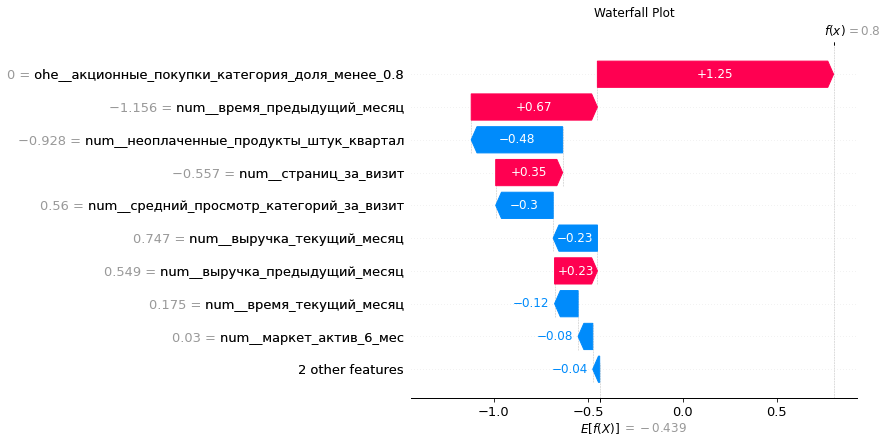

In [72]:
# Построение графика с помощью shap.plots.waterfall для частного случая, shap_values[10] - это для 10 строки
shap.plots.waterfall(shap_values[10], show=False)
plt.title("Waterfall Plot")
plt.show()

**Интерпритация получившегося графика**
   - Сильнее всего на его классификацию влияет признак ohe__акционные_покупки_категория_доля_менее_0.8: он «перетягивает» предсказание в сторону класса й. Значение 𝑓(𝑥)f(x) на графике показывает, к какому классу признак склоняет наблюдение: несмотря на сильное значение ohe__акционные_покупки_категория_доля_менее_0.8 отрицательные значение -0.442 говорит о том, что наблюдение скорее относится к классу 0.

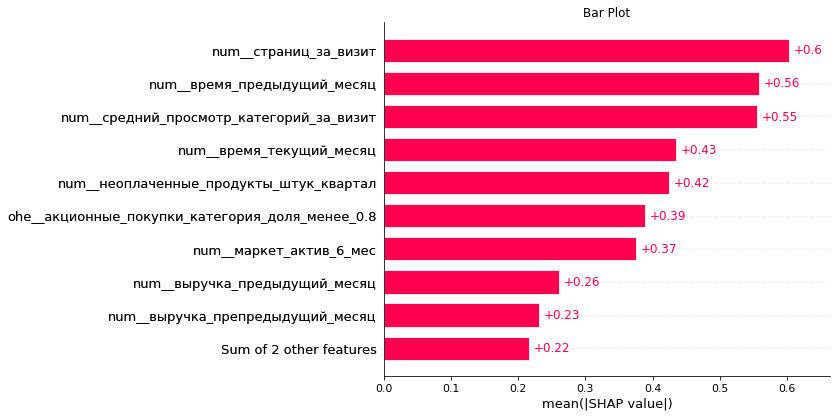

In [73]:
# Преобразование  shap_values  в  матрицу  SHAP
shap_values_matrix = shap_values.values  

# Построение графика с помощью shap.plots.bar
shap.plots.bar(shap_values, show=False)
plt.title("Bar Plot")
plt.show()

**Интерпритация получившегося графика**
- Столбчатая диаграмма shap.plots.bar отражает общий вклад признаков в прогнозы модели. Она показывает средние SHAP-значения признака по всем наблюдениям. Для расчёта средних берут значения Шепли по модулю, чтобы положительные и отрицательные значения не сводили друг друга к нулю.

In [74]:
print(feature_names)

['ohe__акционные_покупки_категория_доля_менее_0.8' 'ord__тип_сервиса'
 'num__страниц_за_визит' 'num__время_предыдущий_месяц'
 'num__время_текущий_месяц' 'num__маркет_актив_6_мес'
 'num__средний_просмотр_категорий_за_визит'
 'num__неоплаченные_продукты_штук_квартал'
 'num__выручка_препредыдущий_месяц' 'num__выручка_предыдущий_месяц'
 'num__выручка_текущий_месяц']


### Вывод

- Наибольшее влияние на определение результата модели оказывает признак 'num__страниц_за_визит'(0.6), который делает более вероятным значение 'Снизилась' целевого признака 'покупательская_активность' 
- Дальше имеют чуть меньшее влияние признаки 'num__время_предыдущий_месяц'(0.56) и 'num__средний_просмотр_категорий_за_визит'(0.55), которые в равной степени влияют на вероятность получения обоих значений целевого признака 
- Далее по степени уменьшения влияния идут признаки: 'num__неоплаченные_продукты_штук_квартал' (0.42, равная вероятность значения целевого признака), 'num__время_текущий_месяц' (0.43, увеличиывает вероятность значения 'Прежний уровень'), 'ohe__акционные_покупки_категория_доля_менее_0.8' (0.39, увеличиывает вероятность значения 'Снизилась'), 'num__маркет_актив_6_мес' (0.38, равная вероятность значения целевого признака). 
- Ну и минимальное влияние на определенние значения целевого признака имеет признак 'num__выручка_препредыдущий_месяц' (0.17, равная вероятность значения целевого признака)

**Итог**

Признаки сильного влияния:
- num__страниц_за_визит: этот признак имеет наибольшее влияние (0.6) и увеличивает вероятность 'Снизилась' покупательской активности.
- num__время_предыдущий_месяц и num__средний_просмотр_категорий_за_визит: эти два признака имеют значительное влияние (0.55 и 0.56) и одинаково влияют на вероятность получения обоих значений целевого признака.

Малозначимые признаки:
- num__выручка_препредыдущий_месяц: Этот признак имеет минимальное влияние на модель (0.17), что делает его практически незначимым для предсказания 'покупательской_активности'.

**Использование наблюдений при моделировании и принятии бизнес-решений**
- Упрощение модели: можно исключить малозначимые признаки (например, num__выручка_препредыдущий_месяц), что упростит модель и может улучшить ее производительность.
- Фокусировка на ключевых признаках: необходимо сосредоточить внимание на сильно влияющих признаках (например, num__страниц_за_визит)и углубить их анализ и поиск связей с целевым признаком.


## Сегментация покупателей

### Задание

Шаг 8. Сегментация покупателей

8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.

8.2 Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 
- Проведите графическое и аналитическое исследование группы покупателей.
- Сделайте предложения по работе с сегментом для увеличения покупательской активности.
8.3 Сделайте выводы о сегментах:
- какой сегмент вы взяли для дополнительного исследования,
- какие предложения вы сделали и почему.

### Выполнение

#### Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.

Для начала создадим общий датафрейм с выбранными признаками для модели и данными из money

В data_for_pipe отсутствует id, вернем его и сделаем из него индес, также в money, сделаем из id индекс
Дальше объеденим данные по индексу

Проверим размер выборок до объединения

In [75]:
data_for_pipe.shape

(1296, 12)

In [76]:
money.shape

(1300, 2)

In [77]:
# В data_for_pipe отсутствует id, вернем его и сделаем из него индес, также в money, сделаем из id индекс
data_for_pipe = data[['id','покупательская_активность', 'страниц_за_визит', 'время_предыдущий_месяц', 'время_текущий_месяц', 
                'маркет_актив_6_мес', 'средний_просмотр_категорий_за_визит', 'выручка_текущий_месяц',
                'неоплаченные_продукты_штук_квартал', 'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц',
                'акционные_покупки_категория', 'тип_сервиса']]

# Делаем 'id' индексом в data_for_pipe и money
data_for_pipe = data_for_pipe.set_index('id')
money = money.set_index('id')

data_for_segments = pd.merge(data_for_pipe, money, left_index=True, right_index=True)

In [78]:
data_for_segments.shape

(1296, 13)

In [79]:
display(data_for_segments.head(5))

,покупательская_активность,страниц_за_визит,время_предыдущий_месяц,время_текущий_месяц,маркет_актив_6_мес,средний_просмотр_категорий_за_визит,выручка_текущий_месяц,неоплаченные_продукты_штук_квартал,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,акционные_покупки_категория,тип_сервиса,прибыль
id,,,,,,,,,,,,,
215349,Снизилась,5,12,10,4.4,4,4971.6,4,4472.0,5216.0,доля_менее_0.8,премиум,4.16
215350,Снизилась,5,8,13,4.9,5,5058.4,2,4826.0,5457.5,доля_менее_0.8,стандарт,3.13
215351,Снизилась,4,11,13,3.2,5,6610.4,0,4793.0,6158.0,доля_более_0.8,стандарт,4.87
215352,Снизилась,2,8,11,5.1,3,5872.5,2,4594.0,5807.5,доля_более_0.8,стандарт,4.21
215353,Снизилась,4,10,10,3.3,4,5388.5,1,5124.0,4738.5,доля_менее_0.8,стандарт,3.95


Cтрок столько же сколько и в data_for_pipe, на один столбец выборка убавилась, т.к id стал индексом, и прибавился один столбец Прибыль, столбцов осталось столько же, 10. Все правильно

Для сегментации будем использовать: 'прибыль' (из money) и признаки сильного влияния 'средний_просмотр_категорий_за_визит', 'num__страниц_за_визит', 'num__время_предыдущий_месяц' из shap

**Выбор сегмента для исследования**

Постоим диаграмму рассеивания на основе данных о прибыли и результатах нашей модели и визуально определим сегмент с которым будем работать

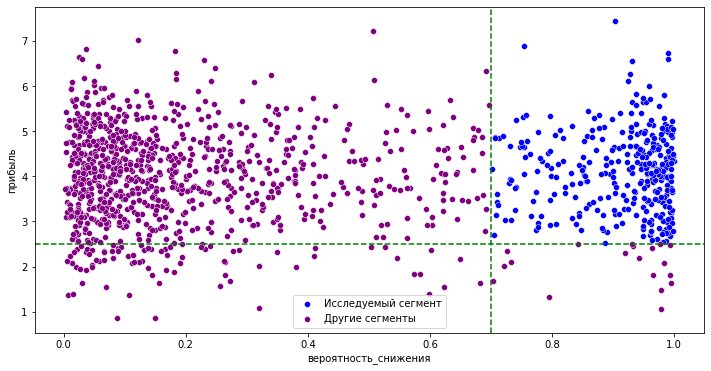

In [80]:
# обучаем нашу модель на исходной выборке 
probabilities = randomized_search.best_estimator_.predict_proba(data_for_pipe)
# получаем вероятность снижения [:, 1], если бы нам требовалась вероятность, что останется прежний уровень мы бы поставили[:, 0]
# помним, что мы закодировали целевой признак print(le.classes_) [«Прежний уровень», «Снизился»], 
# поэтому для вероятности «Снизился» мы выбираем второй столбец значений [:, 1]
probabilities_one = probabilities[:, 1]

# добавляем вероятности в data_for_segments
data_for_segments['вероятность_снижения'] = probabilities_one

plt.figure(figsize=(12, 6))

seg_1_data = data_for_segments[(data_for_segments['вероятность_снижения'] > 0.7) & (data_for_segments['прибыль'] > 2.5)]
other_segments_data = data_for_segments[~((data_for_segments['вероятность_снижения'] > 0.7) & (data_for_segments['прибыль'] > 2.5))]

sns.scatterplot(data=seg_1_data, x='вероятность_снижения', y='прибыль', label='Исследуемый сегмент', color='blue')
sns.scatterplot(data=other_segments_data, x='вероятность_снижения', y='прибыль', label='Другие сегменты', color='purple')

plt.legend()
plt.axvline(x=0.7, color='green', linestyle='--')
plt.axhline(y=2.5, color='green', linestyle='--')
plt.show()

На графике видны следующие сегменты:
- низкая вероятность снижения покупательской активности: это основная часть покупателей, вероятность снижения покупательской активности (до 0.5) и порог по прибыльи 2
- средняя вероятность снижения покупательской активности: незначительная часть клиентов, вероятность снижения покупательской активности (от 0.5 до 0.7)  и порог по прибыли 2.5 
-  высокая вероятность снижения покупателькой активности: вероятность снижения покупательской активности (от 0.7), порог по прибыли 2.5

Выведем долю каждого сегмента от общего кол-ва клиента

In [81]:
low_probability_data = data_for_segments[
    (data_for_segments['вероятность_снижения'] <= 0.5) & (data_for_segments['прибыль'] >= 2)
]
medium_probability_data = data_for_segments[
    (data_for_segments['вероятность_снижения'] > 0.5) & (data_for_segments['вероятность_снижения'] <= 0.7) & \
    (data_for_segments['прибыль'] > 2) & (data_for_segments['прибыль'] >= 2.5)
]
high_probability_data = data_for_segments[
    (data_for_segments['вероятность_снижения'] > 0.7) & (data_for_segments['прибыль'] >= 2.5)
]

total_clients = len(data_for_segments)
low_probability_percent = len(low_probability_data) / total_clients * 100
medium_probability_percent = len(medium_probability_data) / total_clients * 100
high_probability_percent = len(high_probability_data) / total_clients * 100

print("Процент клиентов с низкой вероятностью снижения:", round(low_probability_percent, 2))
print("Процент клиентов со средней вероятностью снижения:", round(medium_probability_percent, 2))
print("Процент клиентов с высокой вероятностью снижения:", round(high_probability_percent, 2))

Процент клиентов с низкой вероятностью снижения: 64.89
Процент клиентов со средней вероятностью снижения: 5.79
Процент клиентов с высокой вероятностью снижения: 25.77


Из описания проекта мы узнали, что активность покупателей интернет магазина начала снижаться и одним из вариантов улучшения ситуации - удерживать активность постоянных клиентов. Соотвественно наиболее интересный для нас с точки зрения исследования является третий сегмент покупателей с высокой вероятностью снижения покупательской активности и прибыльностью выше 2.5.

Далее для упрощения нашего исследования мы разделим выборку на 2 сегмента: Исследуемы сегмент (тот, который мы выбрали) и остальные сегменты.

#### Проведем графическое и аналитическое исследование группы покупателей.
Сформируем предложения по работе с сегментом для увеличения покупательской активности

In [82]:
data_for_segments.columns

Index(['покупательская_активность', 'страниц_за_визит',
       'время_предыдущий_месяц', 'время_текущий_месяц', 'маркет_актив_6_мес',
       'средний_просмотр_категорий_за_визит', 'выручка_текущий_месяц',
       'неоплаченные_продукты_штук_квартал', 'выручка_препредыдущий_месяц',
       'выручка_предыдущий_месяц', 'акционные_покупки_категория',
       'тип_сервиса', 'прибыль', 'вероятность_снижения'],
      dtype='object')

**Отбор признаков для сравнения сегментов**

Выберем пизнаки которые могли бы приветси на снижение покупательской активности:
1. 'акционные_покупки_категория': снижение активности возможно из-за недостаточной информированности покупателей о существующих акциях
2. 'неоплаченные_продукты_штук_квартал': клиент может откладывать покупки из-за недостатка денежных средств, тогда геобходимо будет продумать систему скидок, рекомендовать похожие продукты по акции или предложить вариант рассрочки.
3. тип_сервиса: отстутствие каких-то функций в типе сервиса стандарт могут повлиять на снижение покупательской активности, в таком случае будет необходимо расширение функционала и возможностей которые типа "стандарт", которые смогут повысить покупательскую активность у клиентов.

**1. Сравнение по признаку "акционные_покупки_категория"**

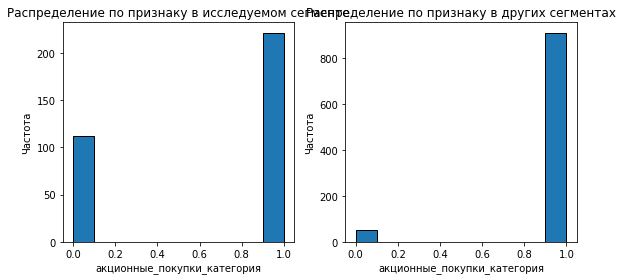

Среднее значение акционные_покупки_категория в исследуемом сегменте: 0.66
Среднее значение акционные_покупки_категория в других сегментах: 0.95


In [83]:
# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем категориальные признаки в числовой формат
seg_1_data['акционные_покупки_категория'] = label_encoder.fit_transform(seg_1_data['акционные_покупки_категория'])
other_segments_data['акционные_покупки_категория'] = label_encoder.fit_transform(other_segments_data['акционные_покупки_категория'])

# Выбираем признак для сравнения
feature_to_compare = 'акционные_покупки_категория'  # Пример, выберите нужный признак

# Строим парные графики
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(seg_1_data[feature_to_compare], bins=10, edgecolor='black', label='Исследуемый сегмент')
plt.title('Распределение по признаку в исследуемом сегменте')
plt.xlabel(feature_to_compare)
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(other_segments_data[feature_to_compare], bins=10, edgecolor='black', label='Другие сегменты')
plt.title('Распределение по признаку в других сегментах')
plt.xlabel(feature_to_compare)
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# Аналитическое исследование
print(f'Среднее значение {feature_to_compare} в исследуемом сегменте: {round(seg_1_data[feature_to_compare].mean(),2)}')
print(f'Среднее значение {feature_to_compare} в других сегментах: {round(other_segments_data[feature_to_compare].mean(),2)}')

Предложения по работе с сегментом:
- Повышения осведомленности о акциях и спецпредложениях.
- Разработки более привлекательных акций.

**2. Сравнение по признаку "неоплаченные_продукты_штук_квартал"**

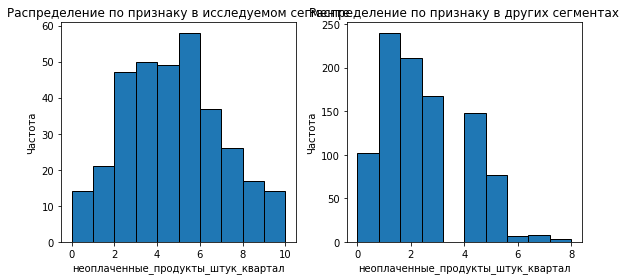

Среднее значение неоплаченные_продукты_штук_квартал в исследуемом сегменте: 4.27
Среднее значение неоплаченные_продукты_штук_квартал в других сегментах: 2.35


In [84]:
# Выбираем признак для сравнения
feature_to_compare = 'неоплаченные_продукты_штук_квартал'  # Пример, выберите нужный признак

# Строим парные графики
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(seg_1_data[feature_to_compare], bins=10, edgecolor='black', label='Исследуемый сегмент')
plt.title('Распределение по признаку в исследуемом сегменте')
plt.xlabel(feature_to_compare)
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(other_segments_data[feature_to_compare], bins=10, edgecolor='black', label='Другие сегменты')
plt.title('Распределение по признаку в других сегментах')
plt.xlabel(feature_to_compare)
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# Аналитическое исследование
print(f'Среднее значение {feature_to_compare} в исследуемом сегменте: {round(seg_1_data[feature_to_compare].mean(),2)}')
print(f'Среднее значение {feature_to_compare} в других сегментах: {round(other_segments_data[feature_to_compare].mean(),2)}')

Предложения по работе с сегментом:

Среднее количество неоплаченных продуктов в исследуемом сегменте почти в два раза выше, чем в других сегментах, поэтому необходимо продумать систему персональных скидок, рекомендовать похожие продукты по акции или предложить гибкие условия оплаты, например рассрочки.

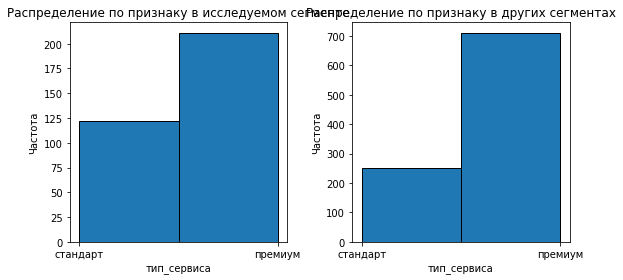

Количество "стандарт" в исследуемом сегменте: 122
Количество "премиум" в исследуемом сегменте: 211
Количество "стандарт" в других сегментах: 252
Количество "премиум" в других сегментах: 711


In [85]:
# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем категориальные признаки в числовой формат
seg_1_data['тип_сервиса'] = label_encoder.fit_transform(seg_1_data['тип_сервиса'])
other_segments_data['тип_сервиса'] = label_encoder.fit_transform(other_segments_data['тип_сервиса'])

# Выбираем признак для сравнения
feature_to_compare = 'тип_сервиса'

# Строим парные графики
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(seg_1_data[feature_to_compare], bins=2, edgecolor='black', label='Исследуемый сегмент')  # 2 бина для 2 значений
plt.title('Распределение по признаку в исследуемом сегменте')
plt.xlabel(feature_to_compare)
plt.ylabel('Частота')
plt.xticks([0, 1], ['стандарт', 'премиум'])  # Отображаем значения на оси X

plt.subplot(1, 2, 2)
plt.hist(other_segments_data[feature_to_compare], bins=2, edgecolor='black', label='Другие сегменты')
plt.title('Распределение по признаку в других сегментах')
plt.xlabel(feature_to_compare)
plt.ylabel('Частота')
plt.xticks([0, 1], ['стандарт', 'премиум'])

plt.tight_layout()
plt.show()

# Аналитическое исследование
# Аналитическое исследование
print(f'Количество "стандарт" в исследуемом сегменте: {len(seg_1_data[seg_1_data[feature_to_compare] == 0])}')
print(f'Количество "премиум" в исследуемом сегменте: {len(seg_1_data[seg_1_data[feature_to_compare] == 1])}')
print(f'Количество "стандарт" в других сегментах: {len(other_segments_data[other_segments_data[feature_to_compare] == 0])}')
print(f'Количество "премиум" в других сегментах: {len(other_segments_data[other_segments_data[feature_to_compare] == 1])}')

Предложения по работе с сегментом:

Доля покупателей с 'премиум' сервисом выше в других сегментах, и их вероятность снижение покупательской активность также ниже, это может свидетельствовать о том, что 'премиум' сервис стимулирует покупательскую активность.
Соответственно для того, чтобы повысить покупательскую активность в исследуемом сегменте необходимо:
- Пересмотр функциональности типа 'стандарт' (например предложить новые функции, которые бы соответствовали потребностям исследуемого сегмента
- Сделать упор на продвижение типа 'премиум'

#### Вывод
Из описания проекта мы узнали, что активность покупателей интернет магазина начала снижаться и одним из вариантов улучшения ситуации - удерживать активность постоянных клиентов. Соотвественно наиболее интересный для нас с точки зрения исследования является сегмент покупателей с высокой вероятностью снижения покупательской активности и прибыльностью выше 2.5.

Выбраны признаки, которые могут влиять на снижение покупательской активности: 
- 'акционные_покупки_категория'
- 'неоплаченные_продукты_штук_квартал'
- 'тип_сервиса'

На основе выбранных признаков было проведено сравнение исследуемого и остальных сегментов и сделаны следующие предложения по работе с сегментом для увеличения покупательской активности:
- Повышения осведомленности о акциях и спецпредложениях.
- Разработки более привлекательных акций.
- Необходимо продумать систему персональных скидок, рекомендовать похожие продукты по акции или предложить гибкие условия оплаты, например рассрочки.
- Пересмотр функциональности типа 'стандарт' (например предложить новые функции, которые бы соответствовали потребностям исследуемого сегмента
- Сделать упор на продвижение типа 'премиум'

## Общий вывод

**Предобработка данных**

- преобразованы столбцы "покупательская_активность", "тип_сервиса", "популярная_категория", "период"в тип данных category
- название столбцов преобразуем в нижний регистр и в стиль snake_case
- пропуски и дубликаты отсутствуют
- в датафрейме money колонка "прибыль" в значениях запятая заменена на точку, а тип данных изменен с object на float
- в датафрейме market_time значение 'предыдцщий_месяц' заменено на 'предыдущий_месяц'
- в датафрейме market_file значение 'стандартт' заменено на 'стандарт'

**Исследовательский анализ**

- выборки money и market_time распределение близкое к нормальному, отсутсвуют выбросы, что позволяет считать данные пригодными для дальнейшего построения модели
- market_money: выявлены и удалены аномалии
- market_file: на основе поля акционные_покупки (бимодальное распределение) создано новое поле акционные_покупки_категория
- отобраны клиенты с покупательской активностью последние 3 месяца

**Корреляционный анализ**

   На основе матрицы корреляции и логический рассуждений определены следующие входные признаки:
   - страниц_за_визит(КК=0.75)
   - время_предыдущий_месяц(КК=0.68)
   - время_текущий_месяц(КК=0.58)
   - маркет_актив_6_мес (КК=0.54)
   - средний_просмотр_категорий_за_визит (КК=0.54)
   - неоплаченные_продукты_штук_квартал(КК=0.5)
   - выручка_препредыдущий_месяц(КК=0.5)
   - акционные_покупки_категория(КК=0.49)
   - выручка_предыдущий_месяц(КК=0.23)
   - выручка_текущий_месяц(КК=0.2)
   - тип_сервиса (добавим один признак для OrdinalEncoder)
   
11 признаков (оптимально 7-10). Добавление большего количества признаков может привести к переобучению модели, которая будет хорошо работать на обучающих данных, но плохо на новых данных

**Моделирование**

RandomizedSearchCV:
1. Лучшая модель: Логистическая регрессия. Хорошо подходит для бинарной задачи классификации, особенно при достаточно большом количестве данных, как в этом случае
2. С=4: Хорошее значение C (в промежутке от 1 до 10) означает, что регуляризация присутствует, но не слишком большая, что позволяет модели выявлять сложные закономерности в данных, не переобучаясь.
3. Использование L1-регуляризации (Lasso) помогает отбирать важные признаки и упрощать модель, что может улучшить её обобщающую способность и интерпретируемость
4. MinMaxScaler и OneHotEncoder позволило лучше всего подготовить данные для обучения модели и улучшить ее точность

GridSearchCV:
1. Лучшая модель: Метод опорных векторов. Модель для классификации, которая основана на поиске оптимальной разделяющей гиперплоскости в многомерном пространстве.
2. Модель не на много показывает лучше результат, чем Логистическая регрессия на тестовой выборке, но алгоритм оптимизации lbfgs (используется по умолчанию в LogisticRegression) не сходится к решению за указанное количество итераций (max_iter).

LogisticRegression более проста для интерпретации, так как можно оценить вклад каждого признака в предсказание. SVC с нелинейным ядром более сложная для интерпретации

**Анализ важности признаков**

- Наибольшее влияние на определение результата модели оказывает признак 'num__страниц_за_визит'(0.6), который делает более вероятным значение 'Снизилась' целевого признака 'покупательская_активность' 
- Дальше имеют чуть меньшее влияние признаки 'num__время_предыдущий_месяц'(0.56) и 'num__средний_просмотр_категорий_за_визит'(0.55), которые в равной степени влияют на вероятность получения обоих значений целевого признака 
- Далее по степени уменьшения влияния идут признаки: 'num__неоплаченные_продукты_штук_квартал' (0.42, равная вероятность значения целевого признака), 'num__время_текущий_месяц' (0.43, увеличиывает вероятность значения 'Прежний уровень'), 'ohe__акционные_покупки_категория_доля_менее_0.8' (0.39, увеличиывает вероятность значения 'Снизилась'), 'num__маркет_актив_6_мес' (0.38, равная вероятность значения целевого признака). 
- Ну и минимальное влияние на определенние значения целевого признака имеет признак 'num__выручка_препредыдущий_месяц' (0.17, равная вероятность значения целевого признака)

**Итог**

Признаки сильного влияния:
- num__страниц_за_визит: этот признак имеет наибольшее влияние (0.6) и увеличивает вероятность 'Снизилась' покупательской активности.
- num__время_предыдущий_месяц и num__средний_просмотр_категорий_за_визит: эти два признака имеют значительное влияние (0.55 и 0.56) и одинаково влияют на вероятность получения обоих значений целевого признака.

Малозначимые признаки:
- num__выручка_препредыдущий_месяц: Этот признак имеет минимальное влияние на модель (0.17), что делает его практически незначимым для предсказания 'покупательской_активности'.

**Использование наблюдений при моделировании и принятии бизнес-решений**
- Упрощение модели: можно исключить малозначимые признаки (например, num__выручка_препредыдущий_месяц), что упростит модель и может улучшить ее производительность.
- Фокусировка на ключевых признаках: необходимо сосредоточить внимание на сильно влияющих признаках (например, num__страниц_за_визит)и углубить их анализ и поиск связей с целевым признаком.


**Сегментация покупателей**

Из описания проекта мы узнали, что активность покупателей интернет магазина начала снижаться и одним из вариантов улучшения ситуации - удерживать активность постоянных клиентов. Соотвественно наиболее интересный для нас с точки зрения исследования является сегмент покупателей с высокой вероятностью снижения покупательской активности и прибыльностью выше 2.5.

Выбраны признаки, которые могут влиять на снижение покупательской активности: 
- 'акционные_покупки_категория'
- 'неоплаченные_продукты_штук_квартал'
- 'тип_сервиса'

На основе выбранных признаков было проведено сравнение исследуемого и остальных сегментов и сделаны следующие предложения по работе с сегментом для увеличения покупательской активности:
- Повышения осведомленности о акциях и спецпредложениях.
- Разработки более привлекательных акций.
- Необходимо продумать систему персональных скидок, рекомендовать похожие продукты по акции или предложить гибкие условия оплаты, например рассрочки.
- Пересмотр функциональности типа 'стандарт' (например предложить новые функции, которые бы соответствовали потребностям исследуемого сегмента
- Сделать упор на продвижение типа 'премиум'


<!-- Старый код по сегментации, чтобы не потерять размещу под проектом -->